


$ H = - \frac{d^2}{dx^2} + V_0 \exp{(-x^2)}$



$H\Psi = E\Psi$

Задачи:
- Найти константы связи $V_0$, при которых в системе возникает 1, 2 или 3 связанных состояния
- Исследовать зависимость вычислительных затрат от размера сетки
- Иссследовать зависимость погрешности энергий состояний от размера сетки и границ бокса


In [1]:
from tokenize import Double
import numpy as np
import time
# from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eig
from matplotlib import pyplot as plt


def getPotentialValue(x: np.double, v_0: np.double) -> np.double:
    return (-1) * v_0 * np.exp(-1 * (x * x), dtype=np.double)

def makeDiffMatrix(n: int, R: np.double, v_0: np.double) -> np.ndarray:
    delta = 2*R / (n-1)
    diagonal = np.zeros(n, dtype=np.double)
    subDiagonal = np.ones(n-1, dtype=np.double) * (-1) / (delta * delta)
    
    xs = np.linspace(-R, R, n, dtype=np.double)
    
    for i in range(n):
        diagonal[i] = 2 / (delta * delta) + getPotentialValue(xs[i], v_0)

    # return diags([diagonal, subDiagonal, subDiagonal], [0, -1, 1])  
    return (diagonal, subDiagonal)



In [5]:
boxBorder = 5
numberOfPoints = 10
V_0 = 2


N = 2 * np.sqrt(V_0/ np.pi) + 1/2
print(N) 

2.0957691216057306


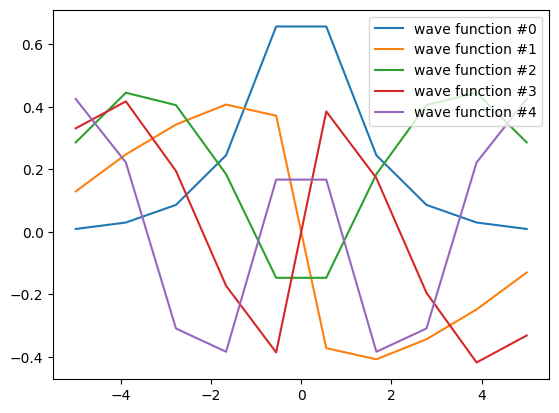

In [6]:
(testD, testSD) = makeDiffMatrix(numberOfPoints, boxBorder, V_0)
# print(testD)
# print(testSD)

w, v = eigh_tridiagonal(testD, testSD)

# print(w)
# print(v, end="--------------------------------------------\n")

xs=np.linspace(-boxBorder, boxBorder, numberOfPoints)

# plt.plot(xs, getPotentialValue(xs, V_0), label="Potential")
for i in range(5):
    # print(v[:,i])
    plt.plot(xs, v[:,i], label=("wave function #" + str(i)))


plt.legend()
plt.show()

<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от константы связи </font>

1  :   [-0.35399195]
2  :   [-0.95478035]
3  :   [-1.64146616 -0.00729761]
4  :   [-2.37544014 -0.15085686]
5  :   [-3.14033547 -0.40612305]
6  :   [-3.92744259 -0.7397841 ]
7  :   [-4.7314869  -1.13132612]
8  :   [-5.54899229 -1.56784625]
9  :   [-6.37752654e+00 -2.04061688e+00 -1.23906717e-03]
10  :   [-7.21530995 -2.543412   -0.07915985]
11  :   [-8.06099429 -3.07160685 -0.21926024]


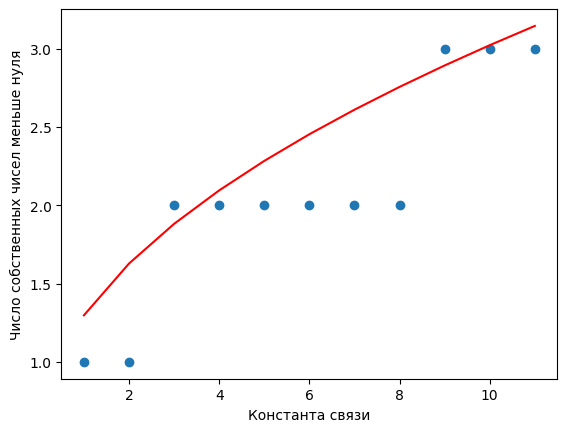

In [7]:
numberOfPoints = 10000
boxBorder = 15
# potentials = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
potentials = [*range(1,12)]
nStatStates = []

for V_0 in potentials:
    (diag, subdiag) = makeDiffMatrix(numberOfPoints, boxBorder, V_0)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    print(V_0, " :  ", w[:5])
    # statState = (w < 0).sum()
    nStatStates.append(len(w))
    

    # plt.plot(xs, getPotentialValue(xs, V_0))

plt.scatter(potentials, nStatStates)
Ns = [2 * np.sqrt(x/ (2 * np.pi)) + 1/2 for x in potentials]
plt.plot(potentials, Ns, color='r')
plt.xlabel("Константа связи")
plt.ylabel("Число собственных чисел меньше нуля")
plt.show()

<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от размера бокса </font>

3.0  :   [-3.13929689 -0.28921889]
4.0  :   [-3.14030414 -0.37871109]
5.0  :   [-3.14033327 -0.39896145]
6.0  :   [-3.14033418 -0.40416982]
7.0  :   [-3.1403343  -0.40558075]
8.0  :   [-3.1403344  -0.40597079]
9.0  :   [-3.14033451 -0.40607952]
10.0  :   [-3.14033464 -0.40611001]
20  :   [-3.14033664 -0.4061249 ]
30  :   [-3.14033998 -0.40613014]
50  :   [-3.14035067 -0.4061469 ]
100  :   [-3.14040078 -0.4062255 ]
200  :   [-3.14060129 -0.40654012]
500  :   [-3.14200771 -0.40875355]
1000  :   [-3.14707198 -0.41682129]
Изменения энергии основного состояния по сравнению с предыдущим шагом:  [3.13929689498552, 0.0010072407661501082, 2.9136269986906882e-05, 9.129513394157129e-07, 1.1112691211678793e-07, 1.0074628686851383e-07, 1.1359782003950158e-07, 1.270585654467027e-07, 2.004218436546523e-06, 3.340473831769941e-06, 1.0689681789521899e-05, 5.011169127477899e-05, 0.0002005100338635657, 0.0014064163573630495, 0.005064268803313787]


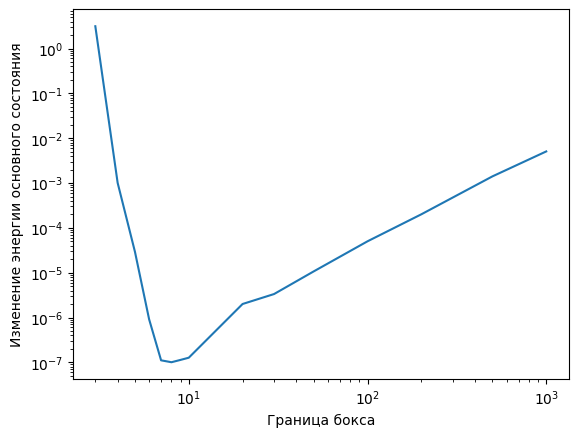

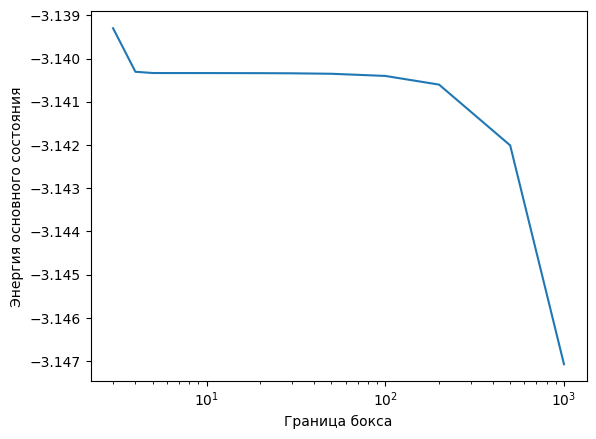

In [8]:
numberOfPoints = 10000
boxBorders = [ 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 50, 100, 200, 500, 1000]
# potentials = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
potential = 5.0
nStatStates = []
gsEnergies = []
errDecreases = []

prevEnergy = 0.0
for boxBorder in boxBorders:
    (diag, subdiag) = makeDiffMatrix(numberOfPoints, boxBorder, potential)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    print(boxBorder, " :  ", w[:5])
    # statState = (w < 0).sum()
    nStatStates.append(len(w))
    if len(w) > 0:
        gsEnergies.append(w[0])
    else:
        gsEnergies.append(0)
    errDecreases.append(abs(w[0] - prevEnergy))
    prevEnergy = w[0]
    # plt.plot(xs, getPotentialValue(xs, V_0))

print("Изменения энергии основного состояния по сравнению с предыдущим шагом: ", end=' ')
print(errDecreases)
plt.plot(boxBorders, errDecreases)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Граница бокса")
plt.ylabel("Изменение энергии основного состояния")
plt.show()

plt.plot(boxBorders, gsEnergies)
plt.xscale('log')
plt.xlabel("Граница бокса")
plt.ylabel("Энергия основного состояния")
plt.show()

<font size="5">Рассмотрим зависимость количества собственных чисел меньше нуля от размера сетки, а также затраты вычислительных ресурсов </font>

100  :   [-0.35624587]
1000  :   [-0.35401353]
10000  :   [-0.35399207]
100000  :   [-0.35399186]
1000000  :   [-0.35399172]
10000000  :   [-0.35398006]
Изменения энергии основного состояния по сравнению с предыдущим шагом:  [0.3562458654757406, 0.0022323354855958155, 2.1456175864353888e-05, 2.1409018080564834e-07, 1.4404665249490023e-07, 1.165128535729476e-05]


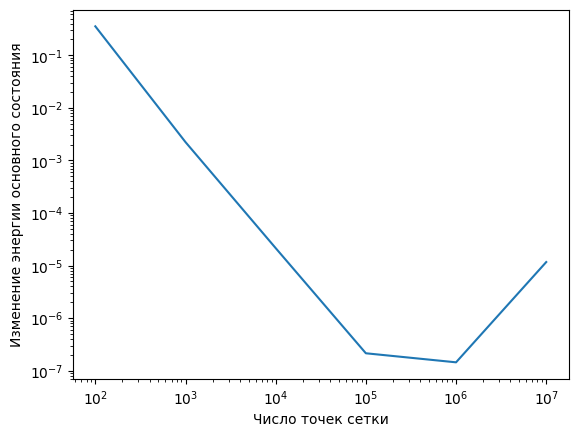

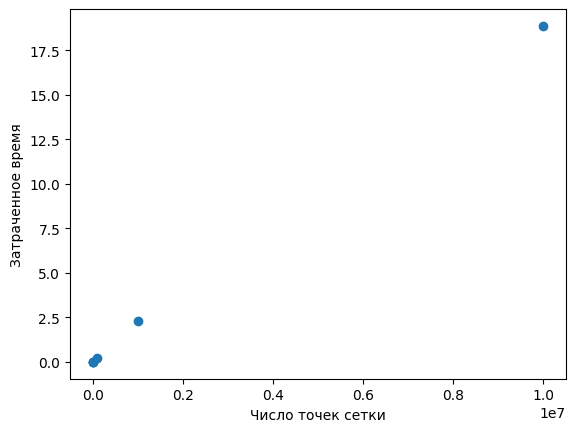

In [9]:
numberOfPoints = [10**x for x in range(2, 8)]
boxBorder = 20
potential = 1
nStatStates = []
computationalTimes = []
errDecreases = []

prevEnergy = 0.0
for nPoints in numberOfPoints:
    start_time = time.time()
    (diag, subdiag) = makeDiffMatrix(nPoints, boxBorder, potential)
    w, v = eigh_tridiagonal(diag, subdiag, select='v', select_range=(-100, 0))
    res_time = time.time() - start_time
    
    print(nPoints, " :  ", w[:5])
    nStatStates.append(len(w))
    computationalTimes.append(res_time)
    
    errDecreases.append(abs(w[0] - prevEnergy))
    prevEnergy = w[0]
    

    # plt.plot(xs, getPotentialValue(xs, V_0))

# plt.scatter(numberOfPoints, nStatStates)
# plt.xscale('log')
# plt.show()
print("Изменения энергии основного состояния по сравнению с предыдущим шагом: ", end=' ')
print(errDecreases)
plt.plot(numberOfPoints, errDecreases)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Число точек сетки")
plt.ylabel("Изменение энергии основного состояния")
plt.show()


plt.scatter(numberOfPoints, computationalTimes)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Число точек сетки")
plt.ylabel("Затраченное время")
plt.show()



In [7]:
print(type(w[0]))

<class 'numpy.float64'>
